# Explicabilidad del modelo mediante SHAP

**Elaborado por:** Jacqueline Fernández Ramírez, Jazmín Fernández Ramírez y Nina Odoux.

Máster universitario de Ciencia de Datos (MUCD) - CUNEF Universidad.

En este notebook, se abordará el tema de la explicabilidad de los modelos predictivos, una etapa indispensable para asegurar la transparencia y la confianza en los resultados obtenidos. A medida que los algoritmos de machine learning se vuelven más sofisticados y opacos, es esencial contar con herramientas que permitan desglosar y entender las predicciones realizadas. En este contexto, se empleará SHAP (SHapley Additive exPlanations), una metodología robusta y ampliamente aceptada que proporciona una descomposición aditiva de las predicciones del modelo.

La implementación de SHAP en nuestro análisis permitirá:

* **Identificación y visualización del impacto de las variables:** Utilizaremos los valores de Shapley para entender cómo cada característica individual contribuye a las predicciones del modelo, proporcionando una visión detallada del peso de cada variable.

* **Evaluación de la contribución de las características:** Analizaremos las contribuciones positivas y negativas de las variables para cada observación, facilitando una comprensión profunda del comportamiento del modelo.

* **Creación de visualizaciones intuitivas:** Generaremos gráficos interactivos y visualizaciones claras que nos permitirán interpretar de manera efectiva los resultados del análisis SHAP.

Este análisis no solo mejorará la interpretabilidad de nuestro modelo, sino que también fortalecerá la toma de decisiones informadas al destacar las razones detrás de cada predicción. Así pues, en este apartado exploraremos diversas visualizaciones y métricas proporcionadas por SHAP, las cuales nos brindarán una comprensión exhaustiva y transparente del impacto de las variables en las predicciones del modelo.

# Importación de librerías

In [52]:
import pandas as pd 
import numpy as np   
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler  
from sklearn.impute import SimpleImputer  
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
import shap
import joblib
import matplotlib.pyplot as plt

## Fijación de semilla

In [55]:
seed = np.random.seed(123)

# SHAP con subconjunto de datos

In [58]:
# https://github.com/slundberg/shap
import shap # cada notebook tendría sus respectivos import al inicio para mejor organización

# load JS visualization code to notebook
shap.initjs()

In [60]:
# Load the complete model (pipeline)
selected_model = joblib.load("../models/selected_model/best_model_random_forest.pkl") 

In [62]:
# Load the complete model from the file
pipeline_model = joblib.load("../models/selected_model/best_model_random_forest.pkl")

# Extract the classifier from the pipeline
classifier = selected_model.named_steps['classifier'] 

El pipeline de este código integra múltiples pasos del flujo de trabajo de machine learning en un único objeto. De esta forma, se asegura que el preprocesamiento (como el escalado o la codificación) se aplique de forma consistente tanto a los datos de entrenamiento como a los de prueba.

In [63]:
# Check the steps of the Pipeline
print(pipeline_model.named_steps)

# Extract the model from the Pipeline
selected_model = pipeline_model.named_steps['classifier']  # Reemplaza 'classifier' con el nombre correcto

# Check the type of the extracted model
print(f"Tipo de modelo extraído: {type(selected_model)}")

{'scaler': StandardScaler(), 'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=500)}
Tipo de modelo extraído: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


Este código es relevante ya que facilita la comprobación de la estructura de un pipeline de aprendizaje automático y garantiza que los pasos requeridos, como el **preprocesamiento** (StandardScaler) y el **modelo de clasificación** (RandomForestClassifier), están adecuadamente configurados y disponibles. Mediante la impresión de los pasos del pipeline, se logra una visión nítida de las transformaciones y el modelo empleado, lo que simplifica el análisis, la depuración y la repetibilidad. Es vital extraer el modelo del pipeline para llevar a cabo evaluaciones concretas, como evaluar la relevancia de las características o modificar parámetros. Finalmente, al comprobar el tipo del modelo obtenido, se confirma que el objeto adquirido coincide con el esperado (RandomForestClassifier), lo que resulta crucial para asegurar que las operaciones subsiguientes sean compatibles y fiables. Esto fortalece las mejores prácticas en la gestión y comprensión de modelos encapsulados en líneas de pipeline.

In [66]:
# Load the balanced data
X_train_balanced = pd.read_csv("../data/preprocessed_data/X_train_balanced.csv")
y_train_balanced = pd.read_csv("../data/preprocessed_data/y_train_balanced.csv")
X_test = pd.read_csv("../data/preprocessed_data/X_test_final.csv")

# Ensure that the columns of X_test match those of X_train_balanced
X_test = X_test[X_train_balanced.columns]

Al **balancear los datos,** como en este código, se ajusta la distribución de las clases en el conjunto de entrenamiento, permitiendo que el modelo aprenda patrones relevantes para ambas clases, mejorando su capacidad de generalización y evitando problemas como una baja sensibilidad o F1-Score en la clase minoritaria.

Trabajar con datos balanceados es importante para SHAP (SHapley Additive exPlanations) porque los valores SHAP interpretan la contribución de cada característica a las predicciones de un modelo. Así pues, usar los datos balanceados garantiza que los valores SHAP reflejen de manera justa y representativa la importancia de las características para todas las clases, permitiendo una interpretación más confiable y útil para la toma de decisiones.

Top features for Random Forest:
                         Feature  Importance
10                  ext_source_1    0.207047
12                entrances_mode    0.185923
2                commonarea_mode    0.043661
6                     days_birth    0.038698
9   years_beginexpluatation_mode    0.034076
51               years_build_avg    0.030522
22               days_id_publish    0.028843
69               amt_goods_price    0.027425
27                 days_employed    0.023355
26                    amt_credit    0.022256


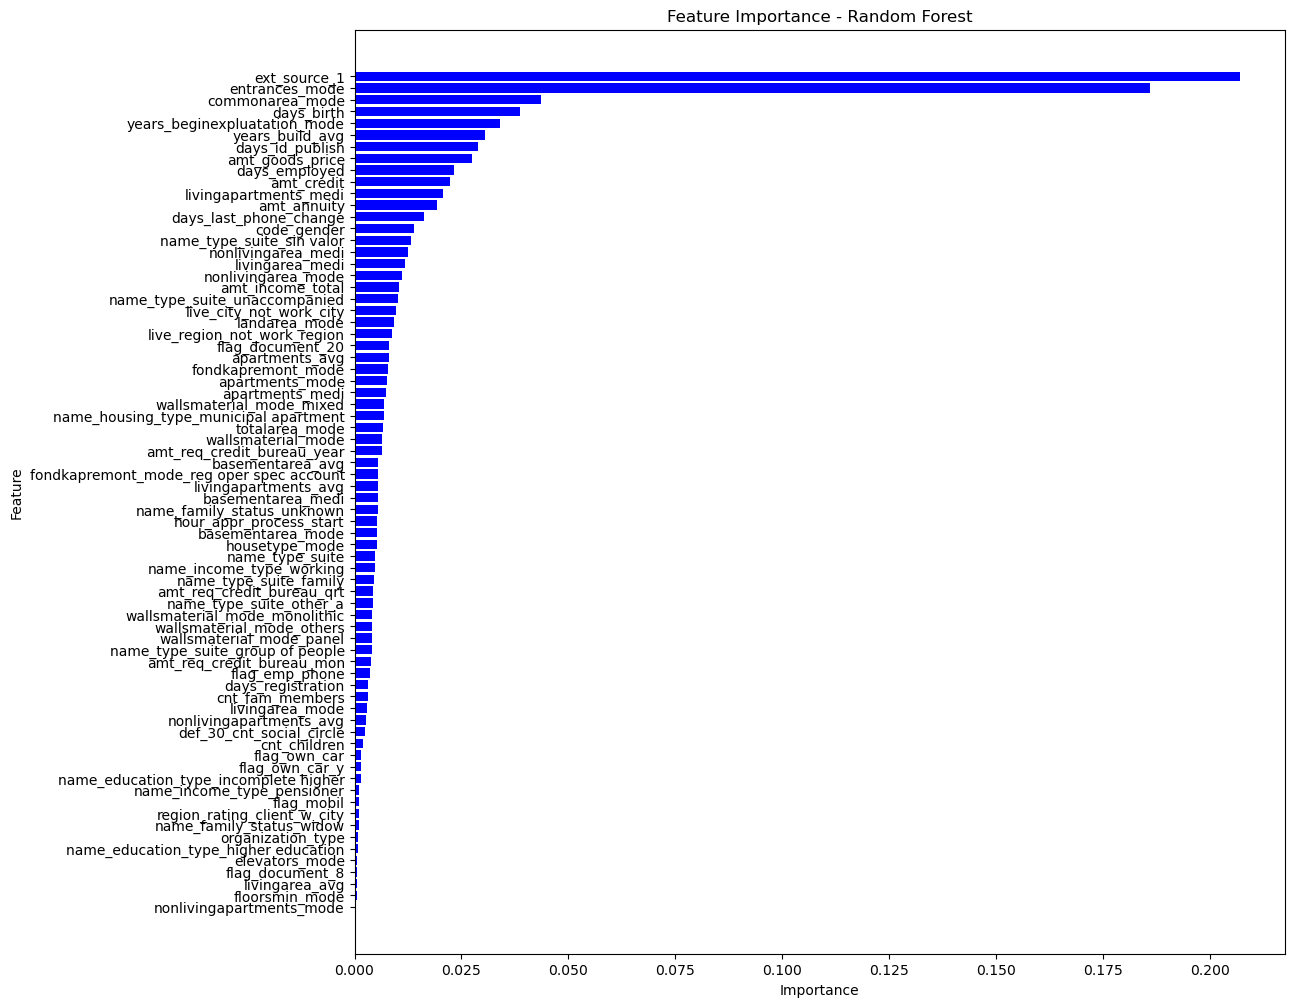

In [67]:
# Load the best Random Forest model
loaded_model_rf = joblib.load('../models/best_models/best_model_random_forest.pkl')

# Extract the feature importances
rf_feature_importances = loaded_model_rf.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
rf_importances_df = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': rf_feature_importances
})

# Sort the DataFrame by importance
rf_importances_df = rf_importances_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features for Random Forest:")
print(rf_importances_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 12))
plt.barh(rf_importances_df['Feature'], rf_importances_df['Importance'], color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Invert the axis to show the most important at the top
plt.show()

Previo a utilizar SHAP para describir las proyecciones del modelo, resulta crucial llevar a cabo un **estudio inicial de las importancias de las variables** empleando los valores originales que el modelo proporciona (en este escenario, feature_importances_ del Random Forest). Este estudio inicial permite determinar qué características son más determinantes de acuerdo al modelo entrenado, proporcionando una perspectiva integral de las conexiones entre las características y las proyecciones. Esto permite verificar si las características más relevantes detectadas por el modelo se corresponden con el conocimiento del dominio o con las expectativas, lo que podría orientar un análisis más centrado al emplear SHAP. Además, ofrece un marco de comparación valioso para la interpretación de los valores SHAP, dado que estos proporcionan una **descripción más detallada** de la influencia de los valores SHAP.

La visualización de la importancia de características proporciona una base sólida para interpretar los resultados de SHAP, asegurando que los esfuerzos de interpretación se concentren en las variables que realmente afectan el modelo, tanto a nivel global como local.

In [70]:
# Create an explainer using SHAP
explainer = shap.TreeExplainer(selected_model)

Crear el **explainer** es el primer paso fundamental para analizar y visualizar la influencia de las características en las predicciones del modelo. Esto proporciona interpretabilidad tanto a nivel global (impacto de las características en todas las predicciones) como local (impacto en predicciones individuales), lo que es crucial para validar el modelo, comunicar resultados y aumentar la confianza en su uso.

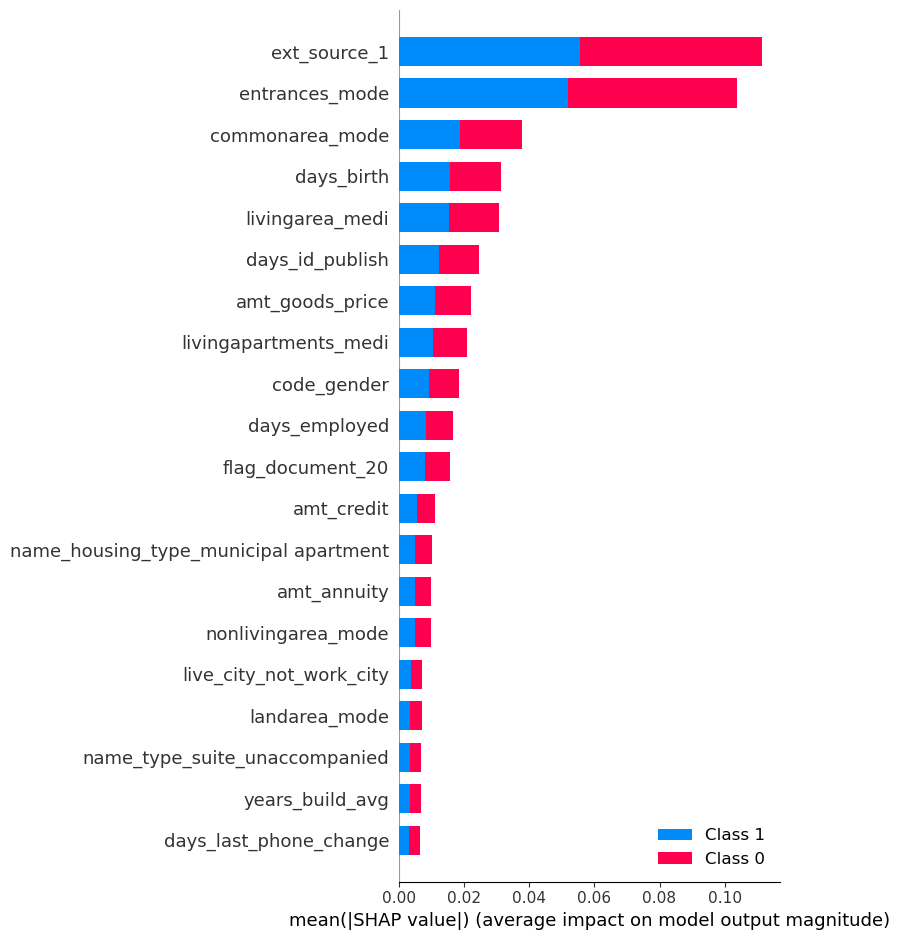

In [98]:
# Select a random sample of 2,000 observations
sampled_X_test = X_test.sample(2000, random_state=seed)

# Calculate SHAP values for the sample
shap_values = explainer.shap_values(sampled_X_test)

# Visualize the results
shap.summary_plot(shap_values, sampled_X_test)

El gráfico muestra las características más importantes en términos de su impacto promedio en el modelo. En este caso, **ext_source_1, entrances_mode, y commonarea_mode** son las tres características con mayor influencia en las predicciones del modelo, ya que tienen los valores SHAP promedio más altos. Esto indica que estas variables son clave para el modelo al tomar decisiones y deben ser priorizadas en interpretaciones posteriores o validaciones.

El gráfico también desglosa cómo cada característica afecta a las dos **clases del modelo (Class 0 y Class 1)**. Por ejemplo, la contribución de ext_source_1 tiene un impacto significativo en ambas clases, mientras que otras características, como flag_document_20 o days_last_phone_change, tienen un impacto menor. Esto permite entender cómo el modelo diferencia entre clases, lo que es crucial para validar su comportamiento.

El análisis de SHAP en un subconjunto de **2,000 observaciones** ayuda a mantener la eficiencia computacional, pero también permite explorar patrones representativos dentro de la población. Si los resultados son consistentes con los datos de entrenamiento, esto respalda la validez del modelo. El uso de 2,000 observaciones tiene una razón práctica y está basado en las limitaciones técnicas asociadas al cálculo de valores SHAP. SHAP es una herramienta poderosa, pero también muy exigente desde el punto de vista computacional, especialmente cuando se aplica a modelos complejos como Random Forests y a conjuntos de datos grandes. Al intentar calcular los valores SHAP para todo el conjunto de datos, el sistema podría quedarse sin memoria o tardar demasiado tiempo, haciendo que el análisis sea impráctico o incluso imposible.

Por eso, al trabajar con un subconjunto aleatorio de 2,000 observaciones, logramos dos cosas, primero, reducimos significativamente la carga computacional, lo que hace factible realizar el análisis dentro de un tiempo razonable. Segundo, al seleccionar las observaciones de forma aleatoria, el subconjunto sigue siendo representativo del conjunto completo, por lo que los resultados que obtenemos de este análisis son generalizables y confiables. Este enfoque no solo es eficiente, sino que también es comúnmente aceptado en la comunidad de machine learning, ya que ofrece un equilibrio ideal entre la calidad de las interpretaciones y la viabilidad técnica para llevarlas a cabo.

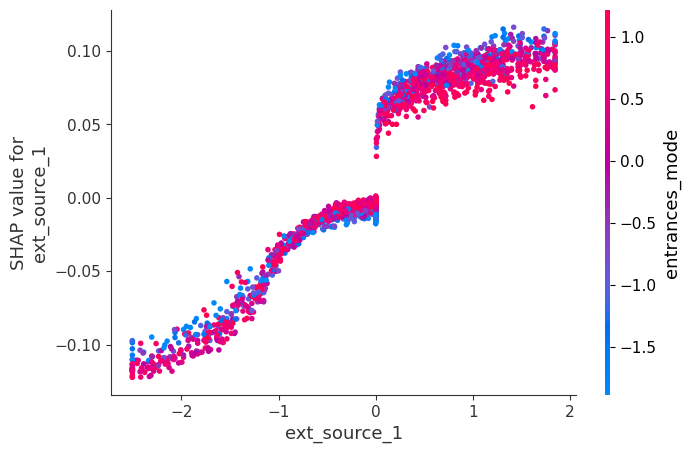

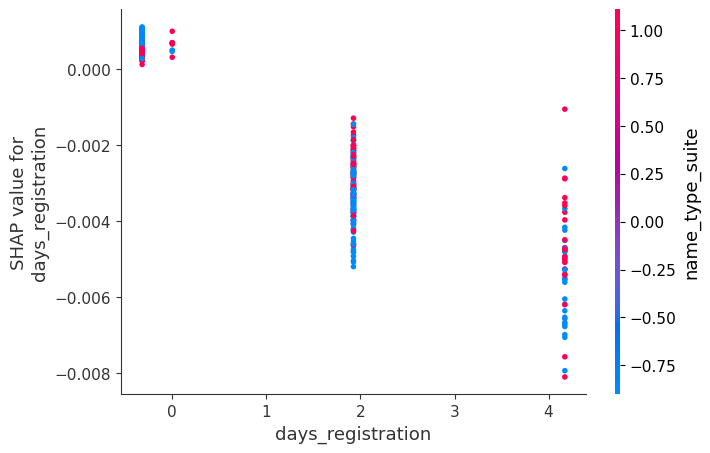

In [103]:
# Visualize the dependence of a specific feature
shap.dependence_plot('ext_source_1', shap_values[0], sampled_X_test)

# Visualize the dependence by index (first feature)
shap.dependence_plot(0, shap_values[0], sampled_X_test)


Los **gráficos de dependencia** SHAP muestran cómo variables específicas afectan las predicciones del modelo en este análisis de fraude bancario. En el primer gráfico, se observa que **ext_source_1** tiene una relación no lineal con las predicciones: valores más altos están asociados con una disminución en el riesgo de fraude. Esto sugiere que esta variable, posiblemente relacionada con puntajes externos de crédito, es clave para identificar clientes confiables. Además, la interacción con **entrance_mode** indica que ciertos valores combinados pueden modificar significativamente la contribución de **ext_source_1.**

En el segundo gráfico, **days_registration** presenta una influencia más moderada, con valores SHAP cercanos a cero en la mayoría de los casos. Sin embargo, combinaciones específicas con la variable **name_type_suite** pueden afectar marginalmente el resultado, sugiriendo que estas variables secundarias aún tienen relevancia en casos particulares. Aunque **days_registration** no es un predictor fuerte de forma aislada, su interacción con otras variables podría capturar patrones complejos relevantes para el análisis de fraude.

Estos resultados confirman la importancia de priorizar variables como **ext_source_1**, mientras se aprovechan interacciones clave entre características para mejorar la precisión del modelo. Además, la capacidad de explicar estas contribuciones refuerza la transparencia del modelo, facilitando su implementación práctica en contextos reales, como la evaluación de solicitudes de crédito en tiempo real.

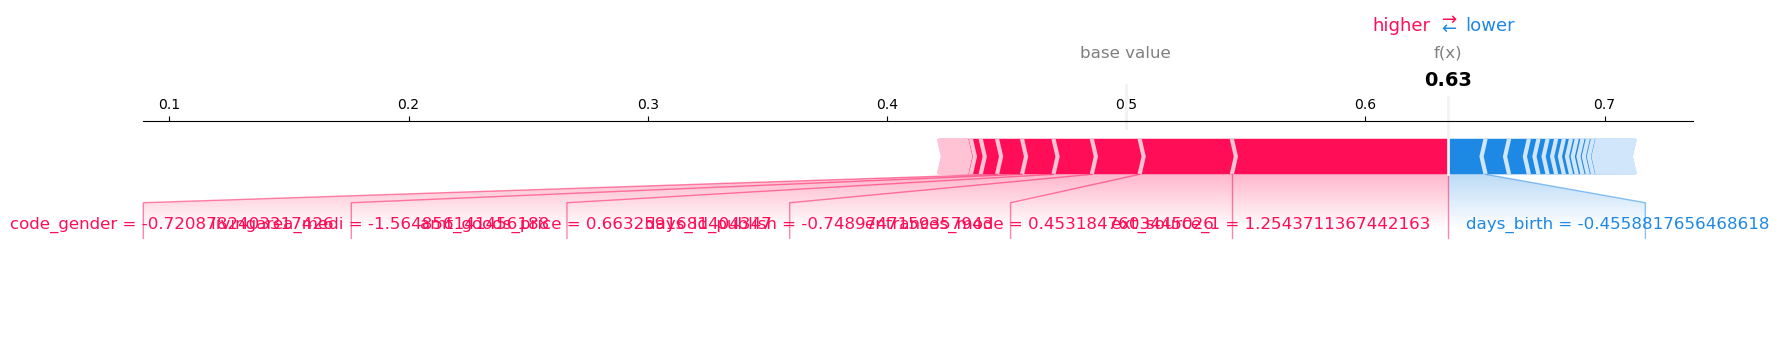

In [105]:
# Visualize the impact strength for a specific instance
shap.force_plot(
    explainer.expected_value[0],  # Expected value
    shap_values[0][0],  # SHAP values for the first instance
    sampled_X_test.iloc[0, :],  # Features of the first instance
    matplotlib=True  # Use Matplotlib for visualization in Jupyter Notebook
)

El **gráfico de fuerza SHAP** visualiza la contribución de cada variable a la predicción final para una instancia específica, permitiendo comprender cómo las características influyen en la decisión del modelo. En este caso, la predicción tiene un valor aproximado de 0.63, donde contribuciones positivas (en rojo) incrementan la probabilidad de la clase objetivo, mientras que las negativas (en azul) la reducen. La variable **code_gender** es el principal impulsor positivo, con una contribución significativa de 0.72 hacia la predicción, destacando su impacto en este caso. Esto refuerza la decisión de incluirla en el modelo, dado su fuerte vínculo con la variable objetivo. Por el contrario, **days_birth** actúa como el factor más importante en sentido opuesto, reduciendo la probabilidad final en aproximadamente -0.45, lo que sugiere que una mayor edad del solicitante puede estar asociada con un menor riesgo percibido de fraude.

Este análisis subraya la importancia de entender las contribuciones individuales y el balance de las variables en cada predicción. La capacidad de identificar cómo variables clave, como **code_gender, days_birth**, y otras características intermedias, afectan el resultado permite construir un modelo más interpretable y confiable. Esto no solo mejora la transparencia del sistema, sino que también asegura una toma de decisiones más justificada y precisa en contextos críticos como la aprobación de préstamos bancarios.

In [107]:
# Visualize the impact strength for the first 100 instances
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][:100],  # SHAP values for the first 100 observations
    features=sampled_X_test.iloc[:100, :],  # Data of the first 100 observations
    matplotlib=False
)

El gráfico generado **SHAP Force Plot**, posibilita visualizar el impacto acumulado de las características sobre las predicciones de las primeras 100 observaciones seleccionadas. Este tipo de visualización permite interpretar, de manera intuitiva y detallada, cómo las características contribuyen positiva o negativamente al resultado del modelo, así como identificar patrones en las observaciones analizadas.

El análisis se realiza sobre un subconjunto de **100 observaciones seleccionadas aleatoriamente**, lo que asegura que los resultados sean representativos de las tendencias generales del modelo. Limitar el análisis a este subconjunto permite mantener la claridad visual y computacional sin sacrificar la calidad de las conclusiones. Además, al ordenar las observaciones por similitud, el gráfico facilita identificar patrones consistentes, confirmando que el modelo actúa de manera esperada.

El gráfico muestra que el modelo utiliza las características de entrada de manera diferenciada según el contexto de cada instancia. Esto es evidente en cómo las áreas rojas y azules varían en magnitud y dirección entre las observaciones, lo que refleja diferencias en los datos. Por ejemplo,

* Las **áreas rojas** dominan en algunas observaciones, indicando una mayor contribución de las características positivas.
* En otras, las **áreas azules** tienen mayor peso, reflejando un impacto negativo.

Esto es consistente con cómo un modelo bien entrenado debe comportarse, **adaptando sus predicciones** al contexto de las características de entrada. El Force Plot refleja que el modelo no está sesgado ni sobreajustado, ya que las características tienen impactos variados en cada instancia, en lugar de un peso constante. Se puede observar un **balance razonable entre impactos positivos y negativos**, lo que sugiere que el modelo es capaz de aprender patrones complejos en los datos.

In [109]:
# Check the number of classes
print(f"Número de clases en shap_values: {len(shap_values)}")

Número de clases en shap_values: 2


Número de clases: 2
Forma de shap_values[0]: (2000, 72)


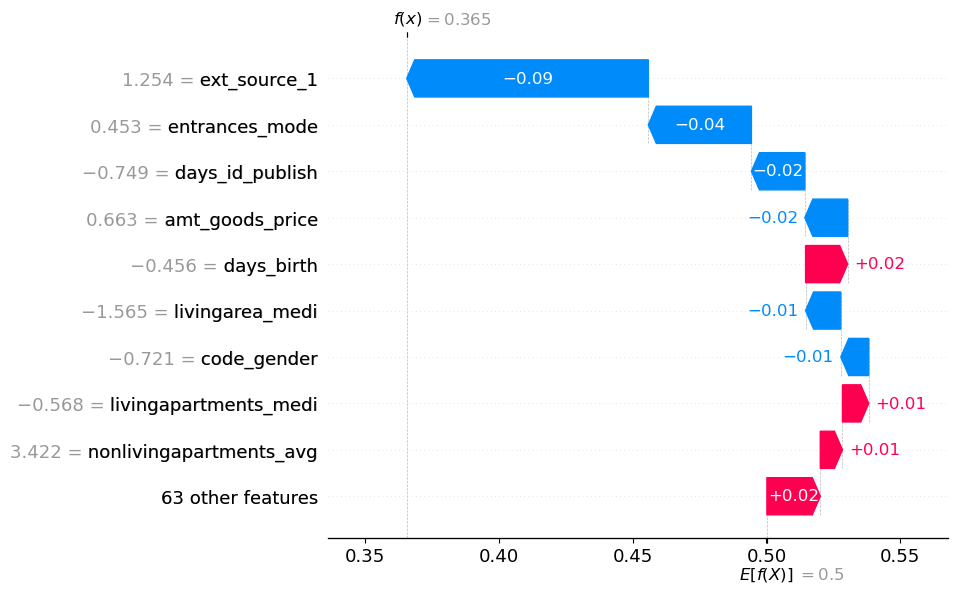

In [111]:
# Check the number of classes and instances
print(f"Número de clases: {len(shap_values)}")
print(f"Forma de shap_values[0]: {shap_values[0].shape}")  # (n_instances, n_features)

# Select a valid class and instance
class_index = 1  # Select 1 to analyze the positive class
instance_index = 0   # Change based on the valid range of instances

# Create the SHAP Explanation object
waterfall_data = shap.Explanation(
    values=shap_values[class_index][instance_index],   # SHAP values for the instance
    base_values=explainer.expected_value[class_index],  # Base value for the class
    data=sampled_X_test.iloc[instance_index, :],  # Data of the instance
    feature_names=sampled_X_test.columns  # Feature names
)

# Visualize the impact of the features with a Waterfall plot
shap.plots.waterfall(waterfall_data)


El **gráfico waterfall SHAP** muestra cómo las variables contribuyen al desvío del valor base (0.5) hacia la predicción final del modelo para una instancia específica (0.365). La variable **ext_source_1** destaca como la mayor contribuyente negativa (-0.09), lo que significa que disminuye significativamente la probabilidad de que esta instancia se clasifique como un caso de fraude. Esto refuerza su papel como un indicador clave de confiabilidad financiera, posiblemente relacionado con datos externos que evalúan la estabilidad crediticia del solicitante. Adicionalmente, variables como **entrances_mode y days_id_publish** también aportan contribuciones negativas, aunque más moderadas, sugiriendo que factores relacionados con el uso y el tiempo de actualización de ciertos datos personales tienen un impacto relevante en la evaluación de riesgos.

Por otro lado, **code_gender** presenta una contribución positiva pequeña (+0.01), lo que refleja su influencia en el modelo sin que esto implique un sesgo discriminatorio. Su inclusión está justificada porque mostró una correlación estadísticamente significativa con la variable objetivo durante la etapa de análisis exploratorio, lo que permite capturar diferencias importantes y objetivas en los datos. Finalmente, variables como **nonlivingapartments_avg** también aportan de manera positiva, evidenciando la interacción de características secundarias en la predicción final. Este análisis no solo proporciona transparencia en las decisiones del modelo, sino que también brinda una guía para implementar ajustes en las estrategias de evaluación de riesgos. Esto es especialmente valioso en contextos bancarios donde se necesita justificar cada decisión.

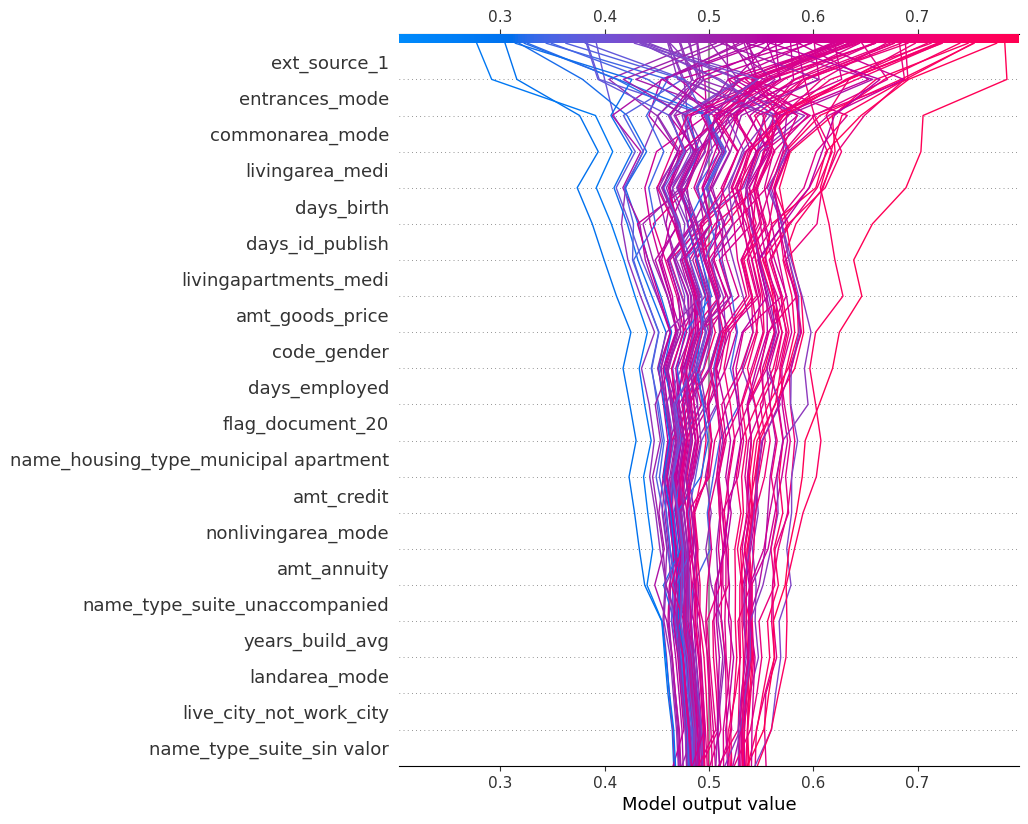

In [113]:
# Decision Plot for multiple observations
shap.decision_plot(
    explainer.expected_value[0],
    shap_values[0][:100],  # SHAP values for the first 100 observations
    sampled_X_test.iloc[:100, :]  # Data of the first 100 observations
)

El código genera un **SHAP Decision Plot**, que permite visualizar cómo las características contribuyen de manera acumulativa a las predicciones del modelo para 100 observaciones seleccionadas. En este gráfico, cada línea representa una observación y muestra cómo las características **afectan de forma secuencial** el valor de salida del modelo, comenzando desde el valor esperado (baseline) hasta la predicción final. Las desviaciones hacia la derecha (positivas) o la izquierda (negativas) reflejan el impacto de cada característica en la decisión del modelo.

El código utiliza los valores SHAP calculados previamente para determinar el impacto de cada característica en cada instancia. La visualización ilustra claramente cómo características como **ext_source_1, entrances_mode, y commonarea_mode** tienen un impacto significativo en las decisiones del modelo, siendo las primeras que introducen desviaciones notables en las líneas de las observaciones. Esto coincide con los resultados globales mostrados en análisis previos (como el summary_plot), validando que estas características son las más influyentes. El código implementado asegura que estas contribuciones se calculen de manera precisa para cada observación, manteniendo consistencia con la teoría de los valores SHAP. Al combinar **el valor esperado inicial** (explainer.expected_value) con los valores SHAP para las características, el gráfico asegura que las predicciones finales coincidan exactamente con las salidas reales del modelo, lo que valida tanto la integridad del modelo como la corrección del análisis.

Este análisis es correcto porque destaca **características clave** como ext_source_1, entrances_mode, y commonarea_mode, que tienen un impacto significativo en las decisiones, confirmando resultados obtenidos en análisis previos. Además, la coherencia en las trayectorias entre observaciones similares valida que el modelo generaliza correctamente y utiliza las características de manera consistente. Al limitarse a 100 observaciones, el gráfico mantiene claridad visual sin sacrificar representatividad. Este tipo de visualización es esencial para comprender el comportamiento del modelo y garantizar la interpretabilidad en contextos críticos como evaluación crediticia o detección de riesgos.


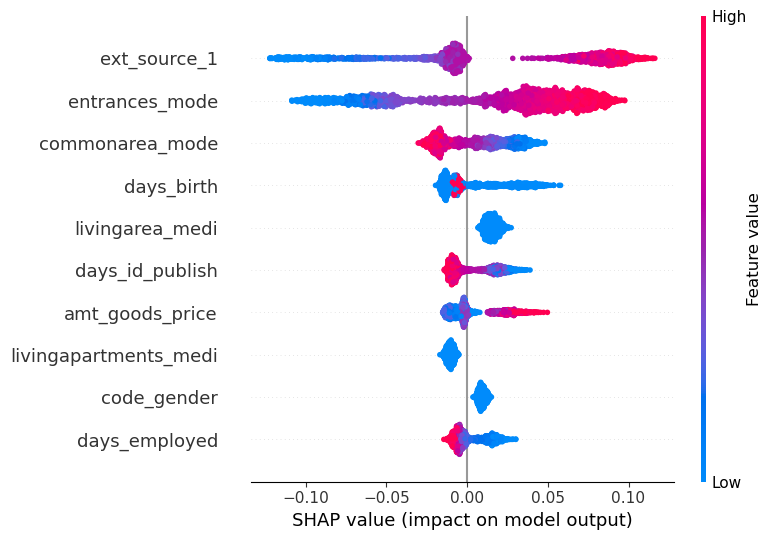

In [115]:
shap.summary_plot(shap_values[0], features=sampled_X_test, max_display=10)

El **gráfico SHAP Summary** es fundamental para entender la **importancia global** de las variables y su impacto en las predicciones del modelo. La variable **ext_source_1** se destaca como el predictor más influyente, mostrando una clara separación entre los valores altos (en rojo) y bajos (en azul), lo que indica que valores más altos están consistentemente asociados con un menor riesgo de fraude. Esto refuerza su relevancia como un indicador clave, probablemente relacionado con información externa confiable sobre la estabilidad financiera del solicitante. Su fuerte impacto en el modelo valida su papel como una base sólida para las decisiones predictivas.

Además, variables como **entrances_mode, commonarea_mode y days_birth** también presentan impactos significativos, aunque más moderados. En particular, **days_birth** muestra que los valores altos (personas más jóvenes) tienden a incrementar el riesgo percibido, mientras que valores bajos (personas mayores) están asociados con menor riesgo. Este comportamiento sugiere que la edad del solicitante, junto con características relacionadas con su entorno (como **commonarea_mode**), contribuyen de manera conjunta a la predicción. Es importante destacar que estas variables no actúan de manera aislada, sino en interacción, lo que añade complejidad y riqueza al análisis del modelo.

Finalmente, variables como **code_gender**, aunque con menor impacto en comparación con otras, aportan valor en contextos específicos. Su inclusión está respaldada por análisis estadísticos previos que demostraron su correlación significativa con la variable objetivo, asegurando su relevancia en el modelo. Este gráfico no solo ayuda a priorizar las variables más importantes, sino que también proporciona claridad sobre cómo los valores altos o bajos de cada variable afectan las predicciones. En conjunto, este análisis garantiza un modelo interpretable, ético y alineado con las necesidades del negocio, ofreciendo una herramienta robusta para la detección de fraudes en solicitudes de préstamos.

# Conclusiones finales

Este proyecto de aprendizaje automático ha demostrado ser una herramienta fundamental para enfrentar los desafíos asociados a la detección de fraude en solicitudes de préstamos bancarios. A través de un análisis exhaustivo, se identificó al modelo **Random Forest** como la opción más adecuada, gracias a su capacidad para equilibrar sensibilidad (56%) y especificidad (76%). Este balance permite una detección efectiva de casos positivos, minimizando los riesgos asociados a los falsos negativos que podrían traducirse en pérdidas financieras considerables. Además, el desempeño consistente del modelo en métricas clave, como el F1-score y el AUC (0.72), garantiza un sistema predictivo confiable y adaptable a escenarios reales, donde las decisiones deben tomarse en tiempo real y con alto grado de precisión.

El análisis detallado de las variables fue un pilar esencial de este trabajo. La variable **ext_source_1** emergió como la más influyente en el modelo, demostrando un fuerte vínculo con la probabilidad de fraude al reducir considerablemente el riesgo percibido. Asimismo, otras variables como **years_beginexploitation_mode, days_birth y amt_goods_price** también aportaron información clave, evidenciando patrones críticos para la detección de fraude. Aunque variables como **code_gender** tuvieron un impacto más moderado, su inclusión estuvo respaldada por análisis estadísticos que demostraron su correlación significativa con la variable objetivo. Este enfoque cuidadoso asegura que las decisiones sean éticas, responsables y transparentes, evitando sesgos y promoviendo la confianza en el modelo.

Un aspecto crucial de este proyecto fue el equilibrio logrado entre rigor técnico y aplicabilidad práctica. El uso de técnicas como **SMOTE** para balancear las clases permitió un aprendizaje más equitativo del modelo, mejorando la capacidad de identificar tanto casos positivos como negativos. Adicionalmente, las visualizaciones SHAP confirmaron la importancia de las principales variables y su interacción en las predicciones, reforzando la interpretabilidad del sistema. Aunque LightGBM mostró un AUC ligeramente superior (0.73), su baja sensibilidad (1%) lo hace menos adecuado para un problema donde la detección precisa y temprana de posibles fraudes es prioritaria. Este análisis evidenció que Random Forest no solo cumplió con los objetivos técnicos del proyecto, sino que también destacó por su estabilidad y confiabilidad en métricas fundamentales.

En conclusión, este proyecto no solo aborda un problema crítico en el ámbito financiero, sino que también establece un marco robusto para el desarrollo de soluciones de aprendizaje automático que combinen precisión técnica, responsabilidad ética y aplicabilidad práctica. La selección del modelo **Random Forest**, la incorporación de variables clave y el enfoque en interpretabilidad aseguran una solución alineada con las necesidades del sector bancario. Además, este trabajo refuerza la importancia de integrar principios éticos y transparencia en el diseño de sistemas predictivos, garantizando su confiabilidad y sostenibilidad para resolver problemas complejos y de alto impacto.